<a href="https://colab.research.google.com/github/vikamayr/Computer-Vision/blob/master/autoencoder2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary modules
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import random
import glob
from PIL import Image
import shutil

In [2]:
# USING AUTOENCODERS IN ANOTHER WAY
# Source Separation with Deep Generative Priors https://arxiv.org/pdf/2002.07942.pdf
# 


In [3]:
# Load in the full CIFAR10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
# Create Dataset of 1000 CIFAR10 images
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, train_size=0.02, test_size=0.1, random_state=42)
print(X_train.shape)

(1000, 32, 32, 3)


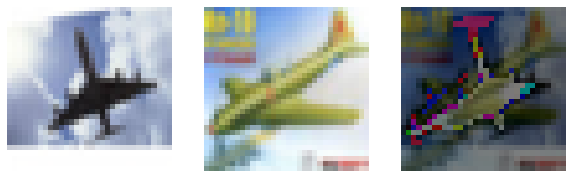

In [5]:
# Visualize two sample images and combination of those

sample1 = random.randint(0, 999)
sample2 = random.randint(0, 999)
combined = (X_train[sample1] + X_train[sample2])/2
combined = combined.astype(np.uint8)

#print(combined.dtype)
#print(combined.max())
#print(combined.min())
#print(X_train[sample1].dtype)
#print(X_train[sample1].max())
#print(X_train[sample1].min())

fig, axs = plt.subplots(1,3,figsize=(10,10))
[axi.set_axis_off() for axi in axs.ravel()]

axs[0].imshow(X_train[sample1])
axs[1].imshow(X_train[sample2])
axs[2].imshow(combined)



In [6]:
# Given a pair of images from CIFAR10 x1 and x2, build a network that can return both images given their average (x1+x2)/2 as the only input.

# combined image x1_x2 of x1 and x2 -> ML model -> return x1 and x2
# input 1 sample of 32x32x3 image - output 2 samples of 32x32x3 images